In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the csv file starting from row 4 (euro vs uk)

In [21]:
df_uk_euro = pd.read_csv('data_uk_2.csv', skiprows=4)
df_uk_euro.dropna(inplace=True)

In [22]:
df_uk_euro.head()

,Period\Unit:,[UK pound sterling ]
2023-09-01,0.85538,Normal value (A)
2023-08-31,0.85718,Normal value (A)
2023-08-30,0.85920,Normal value (A)
2023-08-29,0.85860,Normal value (A)
2023-08-28,0.85815,Normal value (A)


- renaming the column 'Period\\Unit' to 'Time'
- Column 'Time' has unclean data, places where there are hyphens instead of numbers
- I will take the column 'Period\Unit', I will assign it to a variable, change the hyphens to NaNs, reassign the new adjusted column to the original dataframe
- clean - remove records that have NaN values
- add a new column called 'date' that contains the index values of the dataframe (in our case, the index column had the dates)
- creating a plot of the data in the 'df_uk_euro' that has 'date' as the x-axis and 'Period\Unit' as the y-axis
- observe the UK currency against the euro

In [24]:
df_uk_euro.rename(columns={'Period\\Unit:': 'Time'}, inplace=True)

<Axes: xlabel='date'>

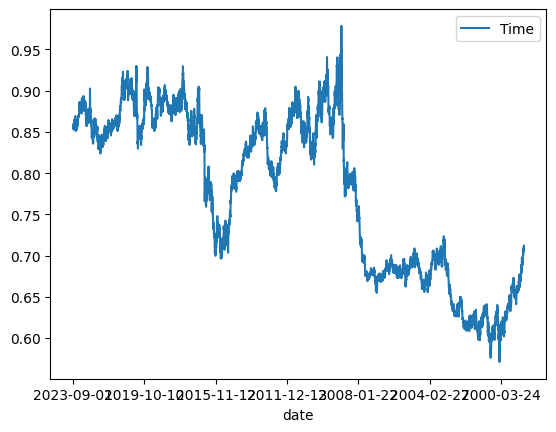

In [25]:
dat = df_uk_euro['Time'].replace('-', float('nan')).astype(float)
df_uk_euro['Time'] = dat
df_uk_euro.dropna(inplace=True)
df_uk_euro['date'] = df_uk_euro.index
df_uk_euro.plot(x='date', y=['Time'])